# Lista 2. Michał Ilski 250079

## Zadanie 1.

W zadaniu modyfikujemy wartości z porzedniej listy (zad 5.) i sprawdzamy wpływ nieznacznych zmian na wyniki.

In [1]:
function f_a(x, y, fl)
    S = fl(0.0)
    for i in 1:length(x)
        S += fl(x[i]) * fl(y[i])
    end
    return S
end

f_a (generic function with 1 method)

In [2]:

function f_b(x, y, fl)
    S = fl(0.0)
    for i in 5:-1:1
        S += fl(x[i]) * fl(y[i])
    end
    return S
end

f_b (generic function with 1 method)

In [3]:
function f_c(x, y, fl)
    values = []
    for i = 1:length(x)
        push!(values, fl(x[i]) * fl(y[i]))
    end
    
    positive = values[values .>= 0]
    sort!(positive, rev=true)
    negative = values[values .< 0]
    sort!(negative)
    
    p_sum = n_sum = 0
    for i in 1:length(positive)
        p_sum += fl(positive[i])
    end
    for i in 1:length(negative)
        n_sum += fl(negative[i])
    end
    return fl(p_sum) + fl(n_sum)
end

f_c (generic function with 1 method)

In [4]:
function f_d(x, y, fl)
    values = []
    for i = 1:length(x)
        push!(values, fl(x[i]) * fl(y[i]))
    end
    
    positive = values[values .>= 0]
    sort!(positive)
    negative = values[values .< 0]
    sort!(negative, rev=true)
    
    p_sum = n_sum = 0
    for i in 1:length(positive)
        p_sum += fl(positive[i])
    end
    for i in 1:length(negative)
        n_sum += fl(negative[i])
    end
    return fl(p_sum) + fl(n_sum)
end

f_d (generic function with 1 method)

In [5]:
function get_old_values(fl)
    return [fl(2.718281828),fl(-3.141592654),fl(1.414213562),fl(0.5772156649),fl(0.3010299957)], 
                    [fl(1486.2497),fl(878366.9879),fl(-22.37492),fl(4773714.647),fl(0.000185049)]
end

get_old_values (generic function with 1 method)

In [6]:
function get_new_values(fl)
    return [fl(2.718281828),fl(-3.141592654),fl(1.414213562),fl(0.577215664),fl(0.301029995)], 
                    [fl(1486.2497),fl(878366.9879),fl(-22.37492),fl(4773714.647),fl(0.000185049)]
end

get_new_values (generic function with 1 method)

In [7]:
fls = [Float32, Float64]
for fl in fls
    x_old, y_old = get_old_values(fl)
    x_new, y_new = get_new_values(fl)
    print(fl, ":\n")
    print("a) old = ", f_a(x_old,y_old,fl), " new = ", f_a(x_new,y_new,fl), "\n")
    print("b) old = ", f_b(x_old,y_old,fl), " new = ", f_b(x_new,y_new,fl), "\n")
    print("c) old = ", f_c(x_old,y_old,fl), " new = ", f_c(x_new,y_new,fl), "\n")
    print("d) old = ", f_d(x_old,y_old,fl), " new = ", f_d(x_new,y_new,fl), "\n")
end

Float32:
a) old = -0.4999443 new = -0.4999443
b) old = -0.4543457 new = -0.4543457
c) old = -0.5 new = -0.5
d) old = -0.5 new = -0.5
Float64:
a) old = 1.0251881368296672e-10 new = -0.004296342739891585
b) old = -1.5643308870494366e-10 new = -0.004296342998713953
c) old = 0.0 new = -0.004296342842280865
d) old = 0.0 new = -0.004296342842280865


Zmiany wprowadzone w ostatnich cyfrach $x_4$ i $x_5$ nie wpłynęły w żaden sposób na Float32, ponieważ precyzja zaokrągla wartości dla wyższych rzędów, niż zostały wprowadzone zmiany. Przykładowo dla $x_4$:

In [8]:
println("Old value in Float32: ", Float32(0.5772156649), " new value in Float32: ", Float32(0.577215664))

Old value in Float32: 0.5772157 new value in Float32: 0.5772157


W Float64 różnice są już widoczne. Dla algorytmu c) i d) są one zauważalne, natomiast dla algorytmów a) i b) są one relatywnie duże i wynoszą aż 7 rzędów różnicy. Oznacza to, że takie zadanie jest źle uwarunkowane, ponieważ niewielka zmiana danych potrafi wygenerować znaczące różnice w wynikach. Powodem tego jest szybkie narastanie błędu w trakcie wykonywania ciągu obliczeń. Oznacza to, że taki proces numeryczny jest niestabliny.

## Zadanie 2.

W zadaniu zostanie sprawdzona zgodność wykresu podanej funkcji z wyliczoną ręcznie granicą.

Wykres funkcji $f(x) = e^{x}\ln(1+e^{-x})$ w języku Python 3 (dla matplotlib, numpy, math)

![](python_plot.png)

oraz w programie GeoGebra:

![](geogebra_1.png)
![](geogebra_2.png)

Granica funkcji $f(x): \lim_{x->\infty}f(x) = \frac{\ln(1+e^{x})}{\frac{1}{e^{x}}} \stackrel{H}{=} \lim_{x->\infty}\frac{\frac{-1}{e^{x}+1}}{\frac{-1}{e^{x}}}=\lim_{x->\infty}\frac{e^{x}}{e^{x}+1}=1$

Jak widać na wykresach, w okoliach $x=32$ pojawiają się oscylacje wokół wartości $1.0$. Od około $x=37$ wartość wynosi już stale $0$ co jest niezgodne z obliczoną granicą. Problemem jest wymnażanie przez siebie wartości $e^x$, która przykładowo dla $x=37$ jest względnie duża, z wartością $\ln(1+e^{x})$, która bardzo szybko zbiega do $0$. Ostatecznie mnożymy jakąś dużą wartość, przez wartość $\approx 0$, co w rezultacie daje $0$, przez wykonane zaokrąglenia liczb. Jak widać dla $x=30$ wartość funkcji jest w przybliżeniu zgodna z oczekiwaniami, a już dla $x=35$ pojawiają się znaczące dla błędy. Dla $x>37$ wynik jest całkowicie błędny, co pokazuje że zadanie jest źle uwarunkowane.

## Zadanie 3.

W zadaniu porównujemy różnice popełnianych błędów podczas wykonywania obliczeń na macierzy Hilberta oraz na losowej macierzy.

In [3]:
function hilb(n::Int)
# Function generates the Hilbert matrix  A of size n,
#  A (i, j) = 1 / (i + j - 1)
# Inputs:
#	n: size of matrix A, n>=1
#
#
# Usage: hilb(10)
#
# Pawel Zielinski
        if n < 1
         error("size n should be >= 1")
        end
        return [1 / (i + j - 1) for i in 1:n, j in 1:n]
end

hilb (generic function with 1 method)

In [4]:
using LinearAlgebra

function matcond(n::Int, c::Float64)
# Function generates a random square matrix A of size n with
# a given condition number c.
# Inputs:
#	n: size of matrix A, n>1
#	c: condition of matrix A, c>= 1.0
#
# Usage: matcond(10, 100.0)
#
# Pawel Zielinski
        if n < 2
         error("size n should be > 1")
        end
        if c< 1.0
         error("condition number  c of a matrix  should be >= 1.0")
        end
        (U,S,V)=svd(rand(n,n))
        return U*diagm(0 =>[LinRange(1.0,c,n);])*V'
end

matcond (generic function with 1 method)

#### Macierz Hilberta

In [5]:
limit = 20

20

In [6]:
for n in 1:limit
    A = hilb(n)
    x = ones(n)
    b = A*x
    gauss = A\b
    inverse = inv(A)*b
    println("n = ", n)
    println("relative error Gauss = ", norm(x-gauss)/norm(x), 
        "; relative error Inversion = ", norm(x-inverse)/norm(x))
    println("rank = ", rank(A), "; cond = ", cond(A), ";")
    println()
end

n = 1
relative error Gauss = 0.0; relative error Inversion = 0.0
rank = 1; cond = 1.0;

n = 2
relative error Gauss = 5.661048867003676e-16; relative error Inversion = 1.4043333874306803e-15
rank = 2; cond = 19.28147006790397;

n = 3
relative error Gauss = 8.022593772267726e-15; relative error Inversion = 0.0
rank = 3; cond = 524.0567775860644;

n = 4
relative error Gauss = 4.137409622430382e-14; relative error Inversion = 0.0
rank = 4; cond = 15513.73873892924;

n = 5
relative error Gauss = 1.6828426299227195e-12; relative error Inversion = 3.3544360584359632e-12
rank = 5; cond = 476607.25024259434;

n = 6
relative error Gauss = 2.618913302311624e-10; relative error Inversion = 2.0163759404347654e-10
rank = 6; cond = 1.4951058642254665e7;

n = 7
relative error Gauss = 1.2606867224171548e-8; relative error Inversion = 4.713280397232037e-9
rank = 7; cond = 4.75367356583129e8;

n = 8
relative error Gauss = 6.124089555723088e-8; relative error Inversion = 3.07748390309622e-7
rank = 8; cond

#### Losowa macierz

In [13]:
for n in [5,10,20]
    for c in [1,10,10^3,10^7,10^12,10^16]
        A = matcond(n,Float64(c))
        x = ones(n)
        b = A*x
        gauss = A\b
        inverse = inv(A)*b
        println("n = ", n, " cond = ", c)
        println("relative error Gauss = ", norm(x-gauss)/norm(x), 
            "; relative error Inversion = ", norm(x-inverse)/norm(x))
        println("rank = ", rank(A), ";")
        println()
    end
end

n = 5 cond = 1
relative error Gauss = 9.930136612989092e-17; relative error Inversion = 1.9860273225978183e-16
rank = 5;

n = 5 cond = 10
relative error Gauss = 4.965068306494546e-17; relative error Inversion = 1.5700924586837752e-16
rank = 5;

n = 5 cond = 1000
relative error Gauss = 1.486563340884008e-14; relative error Inversion = 1.608436924057735e-14
rank = 5;

n = 5 cond = 10000000
relative error Gauss = 4.304319289150695e-10; relative error Inversion = 3.4368438025093585e-10
rank = 5;

n = 5 cond = 1000000000000
relative error Gauss = 2.3802147261703235e-5; relative error Inversion = 1.0493126432736104e-5
rank = 5;

n = 5 cond = 10000000000000000
relative error Gauss = 0.1729047570861553; relative error Inversion = 0.16357815410378002
rank = 4;

n = 10 cond = 1
relative error Gauss = 2.1065000811460205e-16; relative error Inversion = 1.4043333874306804e-16
rank = 10;

n = 10 cond = 10
relative error Gauss = 3.1204970435528155e-16; relative error Inversion = 2.895107444979072e-16

W przypadku macierzy Hilberta $H_n$ oraz losowej macierzy $R_n$ wraz ze wzrostem rozmiaru, wzrastał błąd podczas obliczania wartości $x$. W przypadku macierzy $H_n$ błąd ten rośnie jednak o wiele szybciej niż w przypadku $R_n$, co jest zgodne z obserwacją wzrostu wskaźnika uwarunkowania. Wartości tego wskaźnika dla macierzy $H_n$ rosną względnie szybko, ponadto widać korelację między wartością błędu a wartością wskaźnika. Porównując wyniki dla $H_n$ i $R_n$ można zauważyć, że zadanie dla $H_n$ jest źle uwarunkowane.

## Zadanie 4.

W zadaniu należy sprawdzić, czy wyliczone pierwiastki wielomianu są zgodne z faktyczną wartością oraz sprawdzić uwarunkowanie samego zadania.

In [11]:
using Polynomials #v1.1.10

a)

Współczynniki wielomianu $P(x)$ dla malejących potęg $x$:

In [12]:
P_coefficients=[1, -210.0, 20615.0,-1256850.0,
      53327946.0,-1672280820.0, 40171771630.0, -756111184500.0,          
      11310276995381.0, -135585182899530.0,
      1307535010540395.0,     -10142299865511450.0,
      63030812099294896.0,     -311333643161390640.0,
      1206647803780373360.0,     -3599979517947607200.0,
      8037811822645051776.0,      -12870931245150988800.0,
      13803759753640704000.0,      -8752948036761600000.0,
      2432902008176640000.0]

21-element Array{Float64,1}:
     1.0
  -210.0
 20615.0
    -1.25685e6
     5.3327946e7
    -1.67228082e9
     4.017177163e10
    -7.561111845e11
     1.1310276995381e13
    -1.3558518289953e14
     1.307535010540395e15
    -1.014229986551145e16
     6.30308120992949e16
    -3.1133364316139066e17
     1.2066478037803732e18
    -3.599979517947607e18
     8.037811822645051e18
    -1.2870931245150988e19
     1.3803759753640704e19
    -8.7529480367616e18
     2.43290200817664e18

Wielomian $P(x)$ wygenerowany przy użyciu biblioteki Polynomials:

In [13]:
P = Polynomial(P_coefficients[21:-1:1])

Polynomial(2.43290200817664e18 - 8.7529480367616e18*x + 1.3803759753640704e19*x^2 - 1.2870931245150988e19*x^3 + 8.037811822645051e18*x^4 - 3.599979517947607e18*x^5 + 1.2066478037803732e18*x^6 - 3.1133364316139066e17*x^7 + 6.30308120992949e16*x^8 - 1.014229986551145e16*x^9 + 1.307535010540395e15*x^10 - 1.3558518289953e14*x^11 + 1.1310276995381e13*x^12 - 7.561111845e11*x^13 + 4.017177163e10*x^14 - 1.67228082e9*x^15 + 5.3327946e7*x^16 - 1.25685e6*x^17 + 20615.0*x^18 - 210.0*x^19 + 1.0*x^20)

Pierwiastki tego wielomianu:

In [14]:
P_roots = roots(P)

20-element Array{Float64,1}:
  0.9999999999996989
  2.0000000000283182
  2.9999999995920965
  3.9999999837375317
  5.000000665769791
  5.999989245824773
  7.000102002793008
  7.999355829607762
  9.002915294362053
  9.990413042481725
 11.025022932909318
 11.953283253846857
 13.07431403244734
 13.914755591802127
 15.075493799699476
 15.946286716607972
 17.025427146237412
 17.99092135271648
 19.00190981829944
 19.999809291236637

Wielomian $p(x)$ (matematycznie równoważny) w postaci iloczynowej:

In [15]:
function p(x)
    return (x-1.0)*(x-2.0)*(x-3.0)*(x-4.0)*(x-5.0)*(x-6.0)*(x-7.0)*(x-8.0)*(x-9.0)*(x-10.0)*(x-11.0)*(x-12.0)*(x-13.0)*(x-14.0)*(x-15.0)*(x-16.0)*(x-17.0)*(x-18.0)*(x-19.0)*(x-20.0)
end

p (generic function with 1 method)

In [17]:
for k in 1:20
    println("k = ", k, 
        "; |P(z_k)| = ", abs(P(P_roots[k])),
        "; |p(z_k)| = ", abs(p(P_roots[k])),
        "; |z_k - k| = ", abs(P_roots[k]-k))
end

k = 1; |P(z_k)| = 35696.50964788257; |p(z_k)| = 36626.4254824228; |z_k - k| = 3.0109248427834245e-13
k = 2; |P(z_k)| = 176252.60026668405; |p(z_k)| = 181303.9336725767; |z_k - k| = 2.8318236644508943e-11
k = 3; |P(z_k)| = 279157.6968824087; |p(z_k)| = 290172.2858891687; |z_k - k| = 4.0790348876384996e-10
k = 4; |P(z_k)| = 3.0271092988991085e6; |p(z_k)| = 2.04153729027509e6; |z_k - k| = 1.626246826091915e-8
k = 5; |P(z_k)| = 2.2917473756567076e7; |p(z_k)| = 2.0894625006962176e7; |z_k - k| = 6.657697912970661e-7
k = 6; |P(z_k)| = 1.2902417284205095e8; |p(z_k)| = 1.1250484577562997e8; |z_k - k| = 1.0754175226779239e-5
k = 7; |P(z_k)| = 4.805112754602064e8; |p(z_k)| = 4.5729086427309465e8; |z_k - k| = 0.00010200279300764947
k = 8; |P(z_k)| = 1.6379520218961136e9; |p(z_k)| = 1.5556459377357383e9; |z_k - k| = 0.0006441703922384079
k = 9; |P(z_k)| = 4.877071372550003e9; |p(z_k)| = 4.68781617564839e9; |z_k - k| = 0.002915294362052734
k = 10; |P(z_k)| = 1.3638638195458128e10; |p(z_k)| = 1.26346

Otrzymane pierwiastki dają błędne wyniki po podstawieniu wielomianów. Problemem jest fakt, że wyniki nie mogę być dokładnie przechowywane ze względu na ograniczenia arytmetyki Float64. Mimo, że $z_k$ nie różni się znacząco od $k$, to błędy podczas obliczania wartości wielomianu są już znaczące. Ponadto dla coraz większych k, różnice |$z_k$-$k$| rosną, a co za tym idzie rosną błędy obliczonych wartości $P(z_k)$.

b)

Współczynniki po modyfikacji:

In [18]:
Pw_coefficients = [i != 2 ? P_coefficients[i] : -210-2^(-23) for i in 1:21]

21-element Array{Float64,1}:
     1.0
  -210.0000001192093
 20615.0
    -1.25685e6
     5.3327946e7
    -1.67228082e9
     4.017177163e10
    -7.561111845e11
     1.1310276995381e13
    -1.3558518289953e14
     1.307535010540395e15
    -1.014229986551145e16
     6.30308120992949e16
    -3.1133364316139066e17
     1.2066478037803732e18
    -3.599979517947607e18
     8.037811822645051e18
    -1.2870931245150988e19
     1.3803759753640704e19
    -8.7529480367616e18
     2.43290200817664e18

In [19]:
Pw = Polynomial(Pw_coefficients[21:-1:1])

Polynomial(2.43290200817664e18 - 8.7529480367616e18*x + 1.3803759753640704e19*x^2 - 1.2870931245150988e19*x^3 + 8.037811822645051e18*x^4 - 3.599979517947607e18*x^5 + 1.2066478037803732e18*x^6 - 3.1133364316139066e17*x^7 + 6.30308120992949e16*x^8 - 1.014229986551145e16*x^9 + 1.307535010540395e15*x^10 - 1.3558518289953e14*x^11 + 1.1310276995381e13*x^12 - 7.561111845e11*x^13 + 4.017177163e10*x^14 - 1.67228082e9*x^15 + 5.3327946e7*x^16 - 1.25685e6*x^17 + 20615.0*x^18 - 210.0000001192093*x^19 + 1.0*x^20)

In [20]:
Pw_roots = roots(Pw)

20-element Array{Complex{Float64},1}:
 0.9999999999998357 + 0.0im
 2.0000000000550373 + 0.0im
   2.99999999660342 + 0.0im
  4.000000089724362 + 0.0im
   4.99999857388791 + 0.0im
  6.000020476673031 + 0.0im
   6.99960207042242 + 0.0im
  8.007772029099446 + 0.0im
  8.915816367932559 + 0.0im
 10.095455630535774 - 0.6449328236240688im
 10.095455630535774 + 0.6449328236240688im
 11.793890586174369 - 1.6524771364075785im
 11.793890586174369 + 1.6524771364075785im
 13.992406684487216 - 2.5188244257108443im
 13.992406684487216 + 2.5188244257108443im
  16.73074487979267 - 2.812624896721978im
  16.73074487979267 + 2.812624896721978im
   19.5024423688181 - 1.940331978642903im
   19.5024423688181 + 1.940331978642903im
  20.84691021519479 + 0.0im

In [21]:
for k in 1:20
    println("k = ", k, 
        "; |P(z_k)| = ", abs(Pw(Pw_roots[k])),
        "; |p(z_k)| = ", abs(p(Pw_roots[k])),
        "; |z_k - k| = ", abs(Pw_roots[k]-k))
end

k = 1; |P(z_k)| = 20259.872313418207; |p(z_k)| = 19987.872313406842; |z_k - k| = 1.6431300764452317e-13
k = 2; |P(z_k)| = 346541.4137593836; |p(z_k)| = 352369.413808796; |z_k - k| = 5.503730804434781e-11
k = 3; |P(z_k)| = 2.2580597001197007e6; |p(z_k)| = 2.416241558251844e6; |z_k - k| = 3.3965799062229962e-9
k = 4; |P(z_k)| = 1.0542631790395478e7; |p(z_k)| = 1.126370230029202e7; |z_k - k| = 8.972436216225788e-8
k = 5; |P(z_k)| = 3.757830916585153e7; |p(z_k)| = 4.475744423806907e7; |z_k - k| = 1.4261120897529622e-6
k = 6; |P(z_k)| = 1.3140943325569446e8; |p(z_k)| = 2.1421031658039317e8; |z_k - k| = 2.0476673030955794e-5
k = 7; |P(z_k)| = 3.939355874647618e8; |p(z_k)| = 1.7846173427860644e9; |z_k - k| = 0.00039792957757978087
k = 8; |P(z_k)| = 1.184986961371896e9; |p(z_k)| = 1.868697217000985e10; |z_k - k| = 0.007772029099445632
k = 9; |P(z_k)| = 2.2255221233077707e9; |p(z_k)| = 1.3746309775142996e11; |z_k - k| = 0.0841836320674414
k = 10; |P(z_k)| = 1.0677921232930157e10; |p(z_k)| = 1.4

Porównując wyniki $a)$ oraz $b)$, okazuje się, że dodatkowo zadanie jest źle uwarnkowane. Wynika to z faktu, że niewielkie zaburzenia danych znacząco wpłynęły na wartości wyliczonych pierwiastków, w których pojawiły się liczby zespolone.

## Zadanie 5.

W zadaniu należało porównać wyniki obliczonego modelu wzrostu populacji dla różnych arytmetyk oraz po wprowadzeniu zmian w danych.

a)

In [19]:
p1 = Float32(0.01)
r = Float32(3.0)
arr1 = []
for i in 1:40
    p1 = p1 + r*p1*(1-p1)
    push!(arr1, p1)
end

In [24]:
p2 = Float32(0.01)
r = Float32(3.0) 
arr2 = []
for i in 1:10
    p2 = p2 + r*p2*(1-p2)
    push!(arr2, p2)
end

p2 = trunc(p2, digits=3)
arr2[10] = p2

for i in 11:40
    p2 = p2 + r*p2*(1-p2)
    push!(arr2, p2)
end

In [25]:
println("Version 1: | Version 2:")
for i in 1:40
    println(arr1[i], " | ", arr2[i])
end

Version 1: | Version 2:
0.0397 | 0.0397
0.15407173 | 0.15407173
0.5450726 | 0.5450726
1.2889781 | 1.2889781
0.1715188 | 0.1715188
0.5978191 | 0.5978191
1.3191134 | 1.3191134
0.056273222 | 0.056273222
0.21559286 | 0.21559286
0.7229306 | 0.722
1.3238364 | 1.3241479
0.037716985 | 0.036488414
0.14660022 | 0.14195944
0.521926 | 0.50738037
1.2704837 | 1.2572169
0.2395482 | 0.28708452
0.7860428 | 0.9010855
1.2905813 | 1.1684768
0.16552472 | 0.577893
0.5799036 | 1.3096911
1.3107498 | 0.09289217
0.088804245 | 0.34568182
0.3315584 | 1.0242395
0.9964407 | 0.94975823
1.0070806 | 1.0929108
0.9856885 | 0.7882812
1.0280086 | 1.2889631
0.9416294 | 0.17157483
1.1065198 | 0.59798557
0.7529209 | 1.3191822
1.3110139 | 0.05600393
0.0877831 | 0.21460639
0.3280148 | 0.7202578
0.9892781 | 1.3247173
1.021099 | 0.034241438
0.95646656 | 0.13344833
1.0813814 | 0.48036796
0.81736827 | 1.2292118
1.2652004 | 0.3839622
0.25860548 | 1.093568


Ostatnie wyniki to 0.25860548 (wersja 1) oraz 1.093568 (wersja 2). Wyniki te znacznie się różnią, ponieważ błąd wynikający z obcięcia po 10 iteracjach, rzutuje na kolejne wyniki, co po przeprowadzeniu całego ciągu operacji daje wynik znacząco odbiegający od wersji 1. Do momentu obcięcia wyniki są identyczne (co jest zgodne z intuicją), natomiast po obcięciu zaczynają pojawiać się różnice, które stopniowo kumulują się.

b)

In [26]:
p3 = Float64(0.01)
r = Float64(3.0)
arr3 = []
for i in 1:40
    p3 = p3 + r*p3*(1-p3)
    push!(arr3, p3)
end

In [27]:
println("Float32: | Float64:")
for i in 1:40
    println(arr1[i], " | ", arr3[i])
end

Float32: | Float64:
0.0397 | 0.0397
0.15407173 | 0.15407173000000002
0.5450726 | 0.5450726260444213
1.2889781 | 1.2889780011888006
0.1715188 | 0.17151914210917552
0.5978191 | 0.5978201201070994
1.3191134 | 1.3191137924137974
0.056273222 | 0.056271577646256565
0.21559286 | 0.21558683923263022
0.7229306 | 0.722914301179573
1.3238364 | 1.3238419441684408
0.037716985 | 0.03769529725473175
0.14660022 | 0.14651838271355924
0.521926 | 0.521670621435246
1.2704837 | 1.2702617739350768
0.2395482 | 0.24035217277824272
0.7860428 | 0.7881011902353041
1.2905813 | 1.2890943027903075
0.16552472 | 0.17108484670194324
0.5799036 | 0.5965293124946907
1.3107498 | 1.3185755879825978
0.088804245 | 0.058377608259430724
0.3315584 | 0.22328659759944824
0.9964407 | 0.7435756763951792
1.0070806 | 1.315588346001072
0.9856885 | 0.07003529560277899
1.0280086 | 0.26542635452061003
0.9416294 | 0.8503519690601384
1.1065198 | 1.2321124623871897
0.7529209 | 0.37414648963928676
1.3110139 | 1.0766291714289444
0.0877831 | 0

Ostatnie wyniki to 0.25860548 (Float32) oraz 0.011611238029748606 (Float64). Tym razem różnice w wynikach są spowodowane zastosowaniem różnych arytmetyk, które pozwalają na zapamiętanie różnej liczby cyfr znaczących. Do pewnego momentu różnice te nie są znaczące, jednak wraz z kolejnymi iteracjami błąd ten propaguje się i narasta, dając ostatecznie bardzo różne wyniki. W obu przypadkach a) i b) widzimy efekty niestabilnego procesu numerycznego.

## Zadanie 6.

W zadaniu zostaną porównane wyniki otrzymane dla danego równania rekurencyjnego i różnych wartości wejściowych.

In [23]:
Data = [
    [-2,1],
    [-2,2],
    [-2,1.99999999999999],
    [-1,1],
    [-1,-1],
    [-1,0.75],
    [-1,0.25],
]

7-element Array{Array{Float64,1},1}:
 [-2.0, 1.0]
 [-2.0, 2.0]
 [-2.0, 1.99999999999999]
 [-1.0, 1.0]
 [-1.0, -1.0]
 [-1.0, 0.75]
 [-1.0, 0.25]

Poniższa procedura generuje i zapisuje wykresy funkcji w plikach 1-7.png. Wyświetlany wykres jest jednym z wygenerowanych wykresów. Poniżej znajdują się wczytane wszystkie wykresy oraz ich interpretacja.

c = -2.0 x = 1.0
c = -2.0 x = 2.0
c = -2.0 x = 1.99999999999999
c = -1.0 x = 1.0
c = -1.0 x = -1.0
c = -1.0 x = 0.75


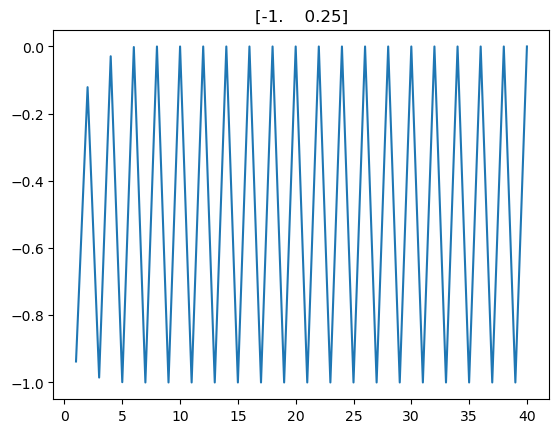

c = -1.0 x = 0.25


In [24]:
using PyPlot
ioff()
iter = 1
for data in Data
    println("c = ", data[1], " x = ", data[2])
    x = data[2]
    c = data[1]
    values = []
    for i in 1:40
        x = x^2 + c
        push!(values,x)
    end
    clf()
    title(data)
    plot(1:40, values)
    name = string(iter, ".png")
    savefig(name)
    iter += 1
end

Wykresy:

![](1.png)
![](2.png)
![](3.png)
![](4.png)
![](5.png)
![](6.png)
![](7.png)

Wykresy 1 i 2 reprezentują stałe wartości, wartości na wykresie 3 wahają się w przedziale $[-2.2]$, wykresy 4-7 to regularne oscylacje od -1 do 0. Różne dane wejściowe dla równania rekurencyjnego dają nie tylko różne wyniki, ale też wpływają na popełniane błędy podczas obliczeń. W przypadku 1 i 2 nie ma widocznych błędów, w przypadku 3 wartości zdają się być wręcz losowe, w przypadku 4 i 5 wartości od początku oscylują od 0 do -1, w 6 i 7 dopiero po kilku iteracjach. Z powyższych przypadków jedynie 3. zdaje się być niestablinym z punktu widzenia procesu numerycznego. W przypadkach 1,2,4,5 wartości są reprezentowane dokładnie, stąd wykresy są od początku stałe lub okresowe. W przypadkach 6,7 wykresy są zgodne z oczekiwanymi granicami i je osiągają, ze względu na skończoną precyjzę.